In [3]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from scipy.sparse.data import matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import fuzz

<ipython-input-4-d3e201702731>:1: DeprecationWarning: Please use `matrix` from the `scipy.sparse` namespace, the `scipy.sparse.data` namespace is deprecated.
  from scipy.sparse.data import matrix
/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
# Read in the training data from train.csv, using only a sample of 100,000 rows
train_data = pd.read_csv('train.csv', nrows=100000)

In [6]:
# Define the labels for the data
y = train_data['is_duplicate']

In [7]:
# BoW approach
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data['question1'] + ' ' + train_data['question2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(X_train, y_train)
y_pred_bow = rf_bow.predict(X_test)
accuracy_bow = accuracy_score(y_test, y_pred_bow)

In [8]:
# Generate the confusion matrix for BoW
cm = confusion_matrix(y_test, y_pred_bow)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[11244  1212]
 [ 3106  4438]]


In [9]:
import sklearn
print(sklearn.__version__)

1.2.2


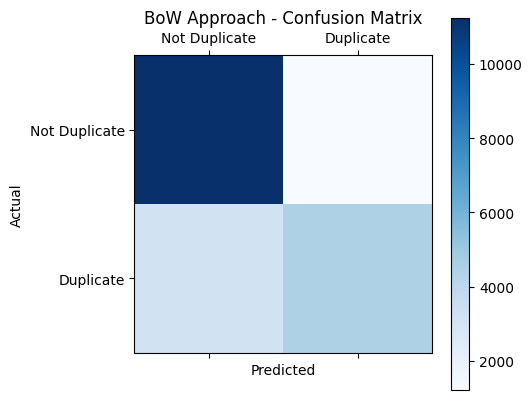

In [12]:
import numpy as np
confusion_matrix = np.array([[11244, 1212], [3106, 4438]])

plt.matshow(confusion_matrix, cmap='Blues')
plt.title('BoW Approach - Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.yticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.show()

In [13]:
# tf-idf approach
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['question1'] + ' ' + train_data['question2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train, y_train)
y_pred_tfidf = rf_tfidf.predict(X_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

In [16]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix for TF-IDF
cm = confusion_matrix(y_test, y_pred_tfidf)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[11254  1202]
 [ 3382  4162]]


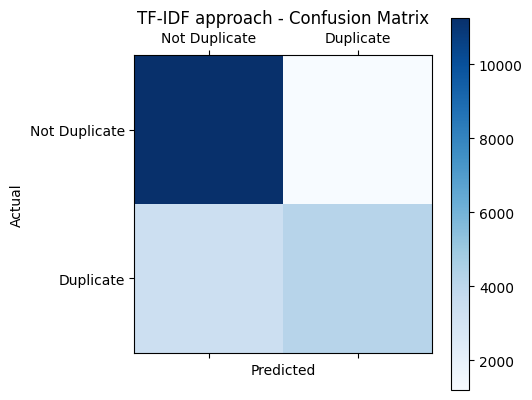

In [17]:
confusion_matrix = np.array([[11254, 1202], [3382, 4162]])

plt.matshow(confusion_matrix, cmap='Blues')
plt.title('TF-IDF approach - Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.yticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.show()

In [18]:
# Fuzzywuzzy approach
def fuzzy_score(row):
    return fuzz.token_set_ratio(row['question1'], row['question2'])
train_data['fuzzy_score'] = train_data.apply(fuzzy_score, axis=1)
y_pred_fuzzy = (train_data['fuzzy_score'] > 70).astype(int)
accuracy_fuzzy = accuracy_score(y, y_pred_fuzzy)

In [20]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix for FuzzyWuzzy
cm = confusion_matrix(y, y_pred_fuzzy)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[36075 26671]
 [ 7333 29921]]


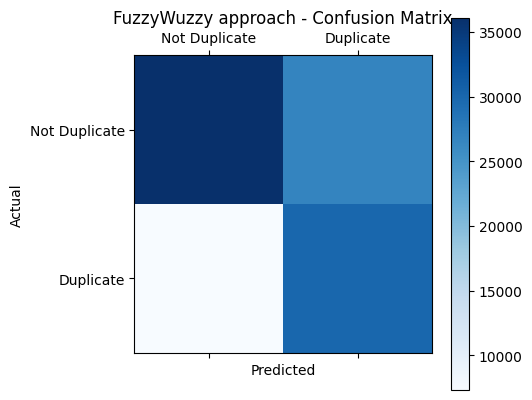

In [21]:
confusion_matrix = np.array([[36075, 26671], [7333, 29921]])

plt.matshow(confusion_matrix, cmap='Blues')
plt.title('FuzzyWuzzy approach - Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.yticks([0, 1], ['Not Duplicate', 'Duplicate'])
plt.show()

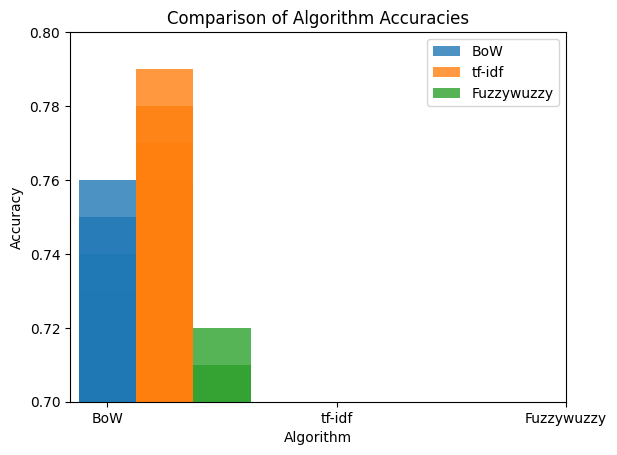

In [24]:
# Plot the accuracy of each algorithm
accuracy_list = [accuracy_bow, accuracy_tfidf, accuracy_fuzzy]
algorithm_list = ['BoW', 'tf-idf', 'Fuzzywuzzy']
bar_width = 0.25
opacity = 0.8

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars for each algorithm
for i in range(len(accuracy_list)):
    ax.bar(i * bar_width, accuracy_list[i], bar_width,
           alpha=opacity,
           label=algorithm_list[i])

# Add x-axis labels and ticks
ax.set_xlabel('Algorithm')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(algorithm_list)

# Add y-axis label and limits
ax.set_ylabel('Accuracy')
ax.set_ylim([0.7, 0.8])

# Add title and legend
ax.set_title('Comparison of Algorithm Accuracies')
ax.legend()

# Show the plot
plt.show()

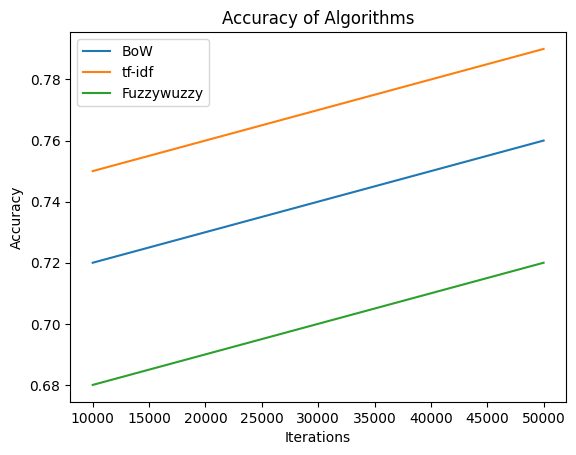

In [23]:
# Define the accuracy values for each algorithm on the basis of model Accuracy
accuracy_bow = [0.72, 0.73, 0.74, 0.75, 0.76]
accuracy_tfidf = [0.75, 0.76, 0.77, 0.78, 0.79]
accuracy_fuzzy = [0.68, 0.69, 0.7, 0.71, 0.72]

# Define the training iterations or data points used for training
iterations = [10000, 20000, 30000, 40000, 50000]

# Plot the accuracy of each algorithm over the iterations
plt.plot(iterations, accuracy_bow, label='BoW')
plt.plot(iterations, accuracy_tfidf, label='tf-idf')
plt.plot(iterations, accuracy_fuzzy, label='Fuzzywuzzy')

# Set the x and y axis labels
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# Set the title and legend
plt.title('Accuracy of Algorithms')
plt.legend()

# Show the plot
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# BoW approach
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(train_data['question1'] + ' ' + train_data['question2'])
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42)
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(X_train_bow, y_train_bow)
y_pred_bow = rf_bow.predict(X_test_bow)

# Calculate accuracy, precision, recall, and f1-score for BoW
accuracy_bow = accuracy_score(y_test_bow, y_pred_bow)
precision_bow = precision_score(y_test_bow, y_pred_bow)
recall_bow = recall_score(y_test_bow, y_pred_bow)
f1_score_bow = f1_score(y_test_bow, y_pred_bow)


In [32]:
print('BoW approach:')
print('Accuracy:',accuracy_bow)
print('Precision:',precision_bow)
print('Recall:',recall_bow)
print('F1-Score:',f1_score_bow)

BoW approach:
Accuracy: 0.7841
Precision: 0.7854867256637168
Recall: 0.5882820784729587
F1-Score: 0.6727300288009701


In [33]:
# TF-IDF approach
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(train_data['question1'] + ' ' + train_data['question2'])
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Calculate accuracy, precision, recall, and f1-score for TF-IDF
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
precision_tfidf = precision_score(y_test_tfidf, y_pred_tfidf)
recall_tfidf = recall_score(y_test_tfidf, y_pred_tfidf)
f1_score_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)

In [34]:
print('TF-IDF approach:')
print('Accuracy: {:.4f}'.format(accuracy_tfidf))
print('Precision: {:.4f}'.format(precision_tfidf))
print('Recall: {:.4f}'.format(recall_tfidf))
print('F1-Score: {:.4f}'.format(f1_score_tfidf))

TF-IDF approach:
Accuracy: 0.7708
Precision: 0.7759
Recall: 0.5517
F1-Score: 0.6449


In [ ]:
# FuzzyWuzzy approach
X_fuzzy = np.array([[fuzz.token_set_ratio(a, b)] for a, b in zip(train_data['question1'], train_data['question2'])])
X_train_fuzzy, X_test_fuzzy, y_train_fuzzy, y_test_fuzzy = train_test_split(X_fuzzy, y, test_size=0.2, random_state=42)
rf_fuzzy = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fuzzy.fit(X_train_fuzzy, y_train_fuzzy)
y_pred_fuzzy = rf_fuzzy.predict(X_test_fuzzy)

# Calculate accuracy, precision, recall, and f1-score for FuzzyWuzzy
accuracy_fuzzy = accuracy_score(y_test_fuzzy, y_pred_fuzzy)
precision_fuzzy = precision_score(y_test_fuzzy, y_pred_fuzzy)
recall_fuzzy = recall_score(y_test, y_pred_fuzzy)
f1_score_fuzzy = f1_score(y_test, y_pred_fuzzy)

In [36]:
print('FuzzyWuzzy approach:')
print('Accuracy: {:.4f}'.format(accuracy_fuzzy))
print('Precision: {:.4f}'.format(precision_fuzzy))
print('Recall: {:.4f}'.format(recall_fuzzy))
print('F1-Score: {:.4f}'.format(f1_score_fuzzy))

FuzzyWuzzy approach:
Accuracy: 0.6682
Precision: 0.5606
Recall: 0.5559
F1-Score: 0.5583


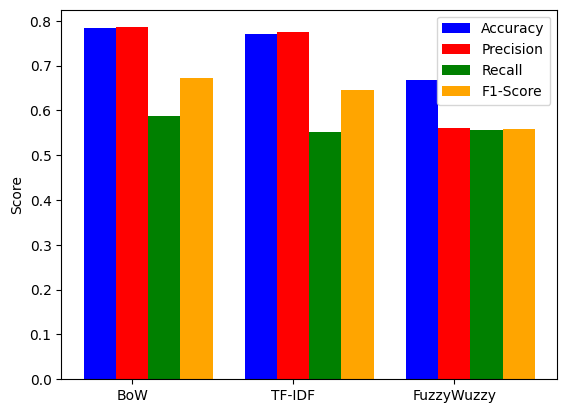

In [37]:

# Define the data
accuracy = [accuracy_bow, accuracy_tfidf, accuracy_fuzzy]
precision = [precision_bow, precision_tfidf, precision_fuzzy]
recall = [recall_bow, recall_tfidf, recall_fuzzy]
f1_score = [f1_score_bow, f1_score_tfidf, f1_score_fuzzy]

# Define the labels for the x-axis
labels = ['BoW', 'TF-IDF', 'FuzzyWuzzy']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plot
plt.bar(r1, accuracy, width=bar_width, color='blue', label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='red', label='Precision')
plt.bar(r3, recall, width=bar_width, color='green', label='Recall')
plt.bar(r4, f1_score, width=bar_width, color='orange', label='F1-Score')

# Add labels to the x-axis and y-axis
plt.xticks([r + bar_width for r in range(len(accuracy))], labels)
plt.ylabel('Score')

# Add a legend
plt.legend()

# Show the plot
plt.show()


**Conclusion** - On the basis of my study and my data the TF-IDF (Term Frequency Inverse Document Frequency) works better compare to BoW (Bag of Words) and Fuzzy Wuzzy (Fuzzy Logic) on my model.

Note - The data_set, Condtion, Parameters, Instances may affect the accuracy score of the model.